#   Linkedin Job Data Analysis 

In [219]:
import pandas as pd 
import numpy as np
import scipy as stats
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [220]:
data = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop\\Project\\job_cleanData.csv")

In [221]:
data.head()

,job_ID,designation,company_id,name,work_type,involvement,employees_count,total_applicants,linkedin_followers,job_details,details_id,industry,level,City,State
0,3471657636,Data Analyst,524.0,Crossover,Remote,Full-time,1001,200,5.395547e+06,About the job Crossover is the world's #1 sour...,2697,IT Services and IT Consulting,Associate,Delhi,Delhi
1,3471669068,Data Analyst,524.0,Crossover,Remote,Full-time,1001,184,5.395547e+06,About the job Crossover is the world's #1 sour...,2724,IT Services and IT Consulting,Associate,New Delhi,Delhi
2,3474349934,Data Analyst,2242.0,Uplers,Remote,Full-time,1001,200,9.821152e+05,About the job Profile: ML EngineersExperience:...,3668,IT Services and IT Consulting,Mid-Senior level,Greater Bengaluru Area,Karnataka
3,3472816027,Data Analyst,1553.0,PVAR SERVICES,On-site,Full-time,1,200,2.094000e+03,About the job Designation: Data AnalystLocatio...,3083,Not Avilable,Not Avilable,Gurugram,Haryana
4,3473311511,Data Analyst,2147.0,Timeline Freight Brokers,On-site,Full-time,1,8,9.821152e+05,About the job The ideal candidate will use the...,3359,Not Avilable,Not Avilable,Mohali district,North West


In [222]:
data.tail()

,job_ID,designation,company_id,name,work_type,involvement,employees_count,total_applicants,linkedin_followers,job_details,details_id,industry,level,City,State
5582,3472039871,BackEnd Developer,1527.0,Orion Innovation,Hybrid,Full-time,5001,25,9.821152e+05,About the job The ideal candidate will show in...,2865,IT Services and IT Consulting,Associate,Kochi,Kerala
5583,3473194471,Software Engineer,2242.0,Uplers,On-site,Full-time,1001,18,9.821152e+05,About the job Experience: 4 - 8 yearsProfile: ...,3343,IT Services and IT Consulting,Mid-Senior level,Gurugram,Haryana
5584,3461005032,Vue.js Developer,2050.0,Tata Consultancy Services,On-site,Full-time,10001,15,1.192363e+07,About the job Role- Vue js DeveloperExperience...,344,IT Services and IT Consulting,Mid-Senior level,Hyderabad,Telangana
5585,3474305684,iOS Developer,2242.0,Uplers,Remote,Full-time,1001,17,9.821152e+05,About the job Profile: iOS DeveloperExperience...,3594,IT Services and IT Consulting,Mid-Senior level,Bengaluru,Karnataka
5586,3459352801,Other Developer,106.0,Akkodis,Hybrid,Full-time,10001,43,1.421090e+06,About the job JD Powertrain Function Developer...,245,IT Services and IT Consulting,Mid-Senior level,Bengaluru,Karnataka


In [223]:
data.shape

(5587, 15)

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5587 entries, 0 to 5586
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   job_ID              5587 non-null   int64  
 1   designation         5587 non-null   object 
 2   company_id          5587 non-null   float64
 3   name                5587 non-null   object 
 4   work_type           5587 non-null   object 
 5   involvement         5587 non-null   object 
 6   employees_count     5587 non-null   int64  
 7   total_applicants    5587 non-null   int64  
 8   linkedin_followers  5587 non-null   float64
 9   job_details         5587 non-null   object 
 10  details_id          5587 non-null   int64  
 11  industry            5587 non-null   object 
 12  level               5587 non-null   object 
 13  City                5587 non-null   object 
 14  State               5587 non-null   object 
dtypes: float64(2), int64(4), object(9)
memory usage: 654.9+

In [225]:
data.nunique()

job_ID                5587
designation             84
company_id            2321
name                  2321
work_type                3
involvement              7
employees_count          8
total_applicants       190
linkedin_followers    2938
job_details           4349
details_id            5587
industry               103
level                    7
City                   123
State                   27
dtype: int64

In [226]:
data.isnull().sum()

job_ID                0
designation           0
company_id            0
name                  0
work_type             0
involvement           0
employees_count       0
total_applicants      0
linkedin_followers    0
job_details           0
details_id            0
industry              0
level                 0
City                  0
State                 0
dtype: int64

In [227]:
data.describe()

,job_ID,company_id,employees_count,total_applicants,linkedin_followers,details_id
count,5.587000e+03,5587.000000,5587.000000,5587.000000,5.587000e+03,5587.000000
mean,3.467219e+09,1165.662431,2119.530517,24.141758,9.834312e+05,2954.158403
std,6.189089e+07,696.076468,3512.711835,52.756793,2.232506e+06,1687.379838
min,1.419216e+08,1.000000,1.000000,0.000000,3.000000e+00,1.000000
25%,3.467374e+09,640.000000,51.000000,0.000000,1.810450e+04,1500.500000
50%,3.472553e+09,957.000000,1001.000000,0.000000,4.501680e+05,2975.000000
75%,3.476290e+09,1849.500000,1001.000000,16.000000,9.821152e+05,4422.500000
max,3.477823e+09,2494.000000,10001.000000,200.000000,1.313679e+07,5843.000000


## Job Market Analysis

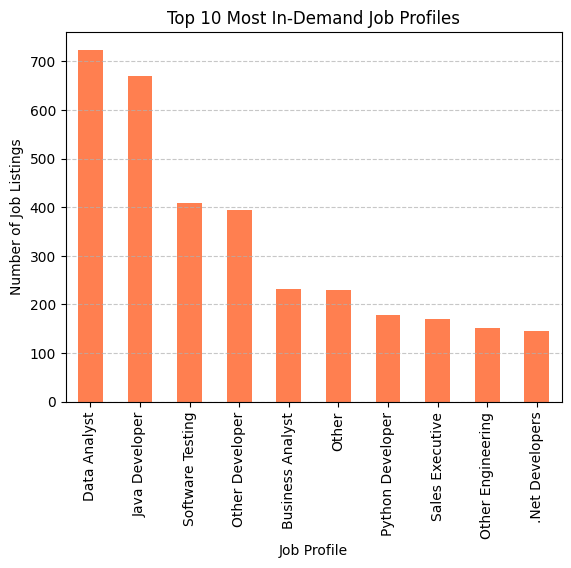

In [228]:
# Top 10 job posting on linkedin
job_count= data["designation"].value_counts().head(10).plot(kind="bar",color="coral")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Top 10 Most In-Demand Job Profiles")
plt.ylabel("Number of Job Listings")
plt.xlabel("Job Profile")
plt.show()



### Top 10 Job Postings on LinkedIn:

1. The most in-demand job is Data Analyst (724 postings), followed by Java Developer (669) and Software Testing (409).
2. Other significant roles include Python Developer (179) and .Net Developers (145).
3. Business and Sales roles also appear in the top 10, showing demand for both technical and non-technical skills.

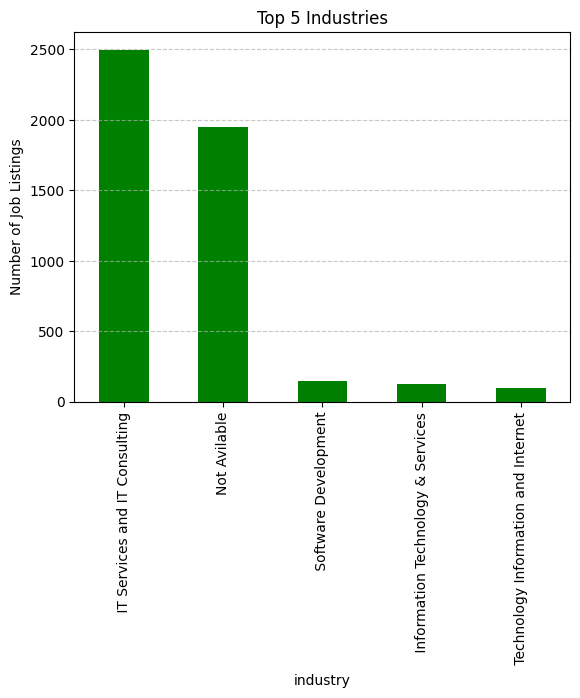

In [243]:
# Top 5 Industries 
indus= data["industry"].value_counts().head(5).plot(kind="bar",color="green")
plt.title("Top 5 Industries")
plt.ylabel("Number of Job Listings")
plt.grid(axis="y", linestyle="--", alpha=0.7)



### Top 5 Industries:

1. IT Services & Consulting (2498 jobs) is the leading industry, followed by Software Development (146) and Information Technology & Services (127).
2. A large number of postings (1951) do not specify an industry, which could indicate incomplete or inconsistent data.

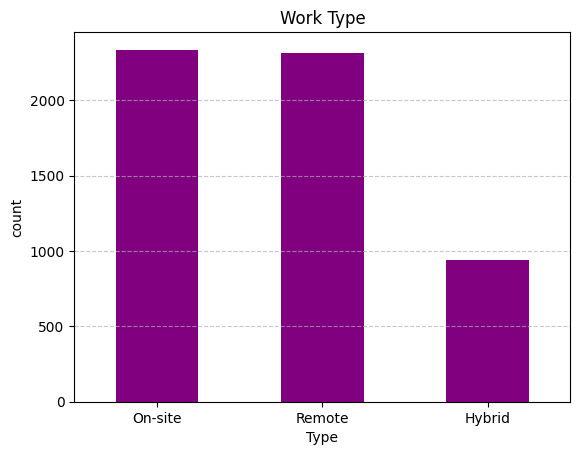

In [230]:
# which work type company posting now
work_type= data["work_type"].value_counts().head(5).plot(kind="bar",color="purple")
plt.title("Work Type")
plt.xticks(rotation=0)
plt.xlabel("Type")
plt.ylabel("count")
plt.grid(axis="y", linestyle="--", alpha=0.7)



### Work Type Distribution:

1. On-site (2334 jobs) and Remote (2315 jobs) have nearly equal distributions.
2. Hybrid jobs (938) are significantly fewer, indicating that companies either prefer full remote or fully on-site work arrangements.


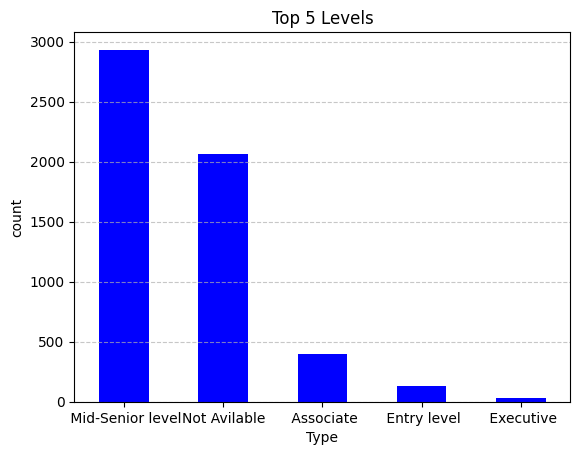

In [231]:
# most posting job levels
Level= data["level"].value_counts().head(5).plot(kind="bar",color="blue")
plt.title("Top 5 Levels")
plt.xticks(rotation=0)
plt.xlabel("Type")
plt.ylabel("count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

### Top 5 Job Levels
1. Mid-Senior Level roles dominate the job postings (2,932 jobs) – This suggests that companies are primarily looking for experienced professionals rather than freshers.
2. A large number of job postings (2,063) have 'Not Available' in the level field, indicating incomplete data or job levels not being explicitly mentioned by recruiters.
3. Associate-level jobs (400) are the next most common, showing demand for early-career professionals.
4. Entry-level positions (127) are significantly lower, meaning fewer opportunities for fresh graduates or candidates with minimal experience.
5. Executive-level roles (34) are the least common, suggesting that leadership roles are either rare or not frequently advertised on LinkedIn.

## Location Analysis

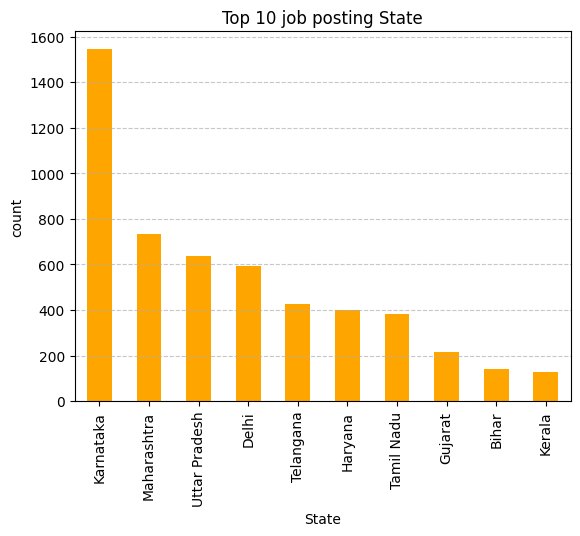

In [232]:
# Top 10 job posting states
state= data["State"].value_counts().head(10).plot(kind="bar",color="orange")
plt.title("Top 10 job posting State")
plt.xticks()
plt.xlabel("State")
plt.ylabel("count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

### Top 10 States for Job Postings:

1. Karnataka (1545 jobs) has the highest number of job postings, followed by Maharashtra (734) and Uttar Pradesh (639).
2. Delhi (592) and Telangana (425) also have strong job markets.
3. Bihar and Kerala have the fewest jobs among the top 10 states, indicating fewer opportunities in these regions.

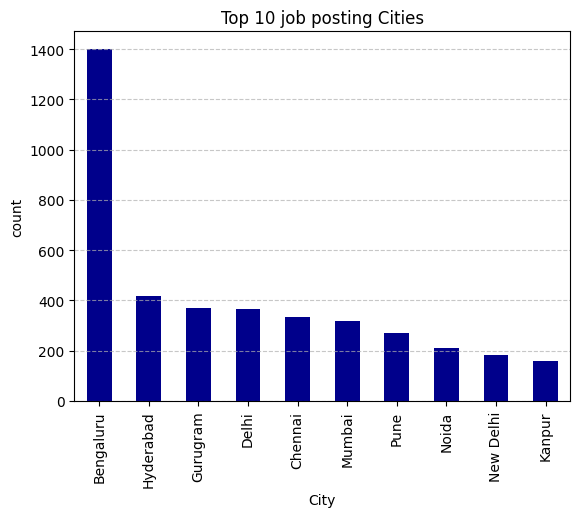

In [233]:

City= data["City"].value_counts().head(10).plot(kind="bar",color="darkblue")

plt.title("Top 10 job posting Cities")
plt.xticks()
plt.xlabel("City")
plt.ylabel("count")
plt.grid(axis="y", linestyle="--", alpha=0.7)

### Top 10 Cities for Job Postings:

1. Bengaluru (1401 jobs) dominates, reflecting its status as India's tech hub.
2. Hyderabad (417), Gurugram (370), and Delhi (367) are also major employment centers.
3. Kanpur (158 jobs) appears in the top 10 despite being a non-metro city, which may indicate growth in employment opportunities.

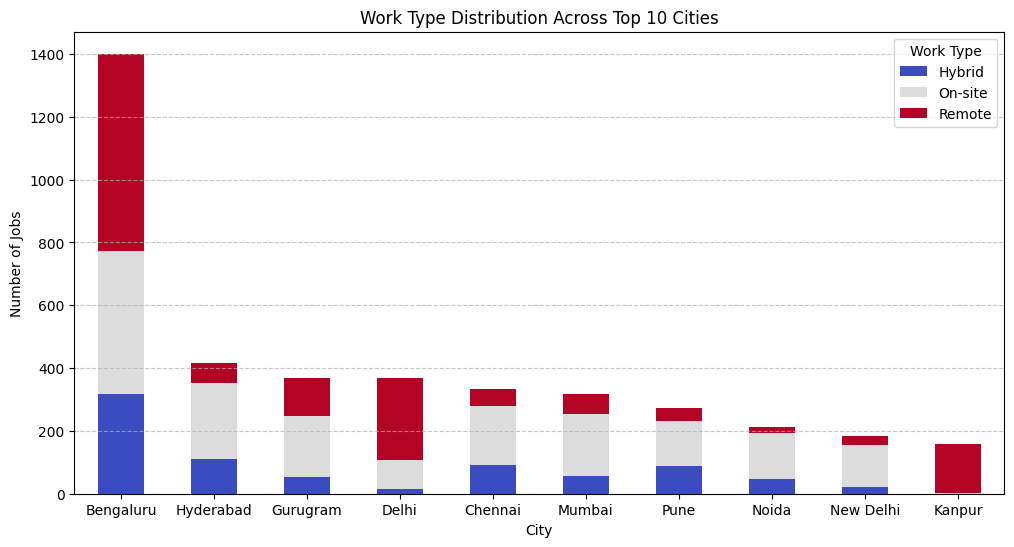

In [234]:
# Count work type distribution per city (Top 10 cities)
city_work_type = data.groupby(["City", "work_type"]).size().unstack().fillna(0)
top_cities = data["City"].value_counts().head(10).index  # Select top 10 cities
city_work_type = city_work_type.loc[top_cities]

# Plot
city_work_type.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Work Type Distribution Across Top 10 Cities")
plt.xlabel("City")
plt.ylabel("Number of Jobs")
plt.xticks(rotation=0)
plt.legend(title="Work Type")
plt.show()


### Work Type Distribution Across Top 10 Cities:
1. Bengaluru leads in job postings across all work types – It has the highest remote (627), on-site (455), and hybrid (319) jobs, reaffirming its status as India’s top IT and corporate hub.
2. Delhi has a strong remote work trend (261 jobs), while on-site and hybrid roles are comparatively lower, making it a favorable location for work-from-home opportunities.
3. Hyderabad and Mumbai have a balanced mix of on-site, hybrid, and remote roles, making them versatile job markets.
4. Kanpur is an outlier, with almost all jobs being remote (157) and hardly any on-site or hybrid positions – This suggests that most opportunities in Kanpur cater to remote workers, possibly from startups or freelancing roles.
5. Gurugram, Chennai, and Pune have a significant number of on-site jobs, indicating a preference for traditional office-based roles in these cities.
6. Noida and New Delhi show a similar trend, with more on-site roles compared to remote and hybrid positions.

## Company Analysis

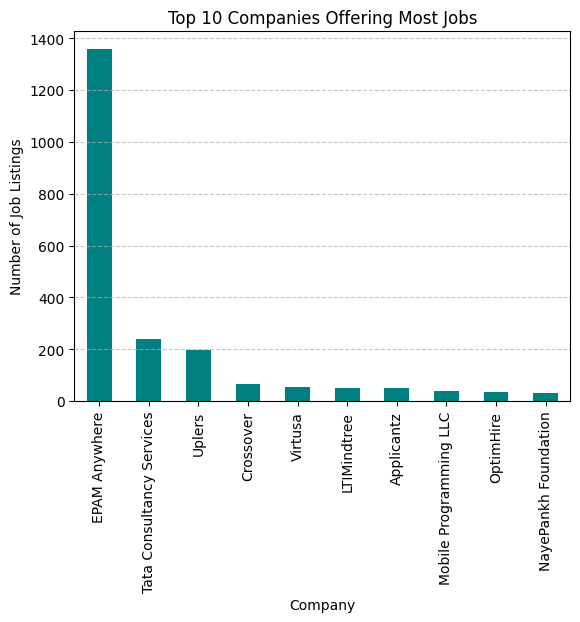

In [244]:
top_com= data["name"].value_counts().head(10).plot(kind="bar",color="teal")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Top 10 Companies Offering Most Jobs")
plt.ylabel("Number of Job Listings")
plt.xlabel("Company")
plt.show()


### Top 10 Companies Offering the Most Jobs:

1. EPAM Anywhere (1358 jobs) has the highest number of postings, significantly outpacing competitors.
2. Tata Consultancy Services (TCS) (238), Uplers (199), and Crossover (65) are also among the top employers.
3. NayePankh Foundation (31 jobs), a lesser-known company, appears in the top 10, suggesting high recruitment activity.


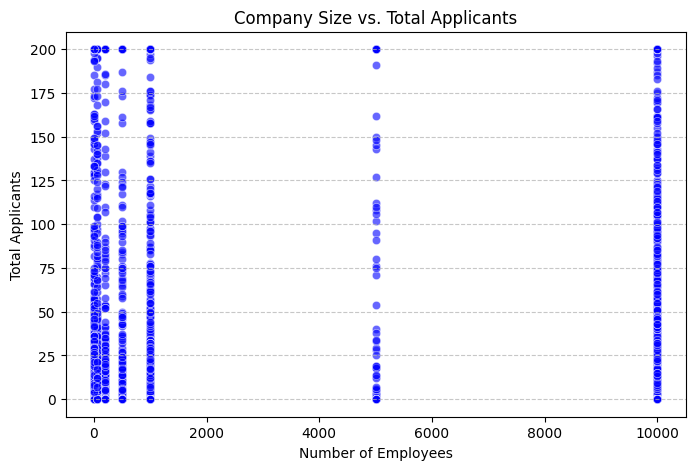

In [236]:
# Scatter plot: Company size vs. Total applicants
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x="employees_count", y="total_applicants", alpha=0.6, color="blue")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.title("Company Size vs. Total Applicants")
plt.xlabel("Number of Employees")
plt.ylabel("Total Applicants")
plt.show()

### Company Size vs. Total Applicants (Scatter Plot Analysis):

1. Larger companies (1000+ employees) generally receive higher applicant numbers.
2. Small companies (1-50 employees) have mixed results, with some postings receiving high applications, possibly due to niche opportunities or startup appeal.
3. High applicant counts in smaller companies could indicate competitive job markets or a strong demand for remote/flexible roles.

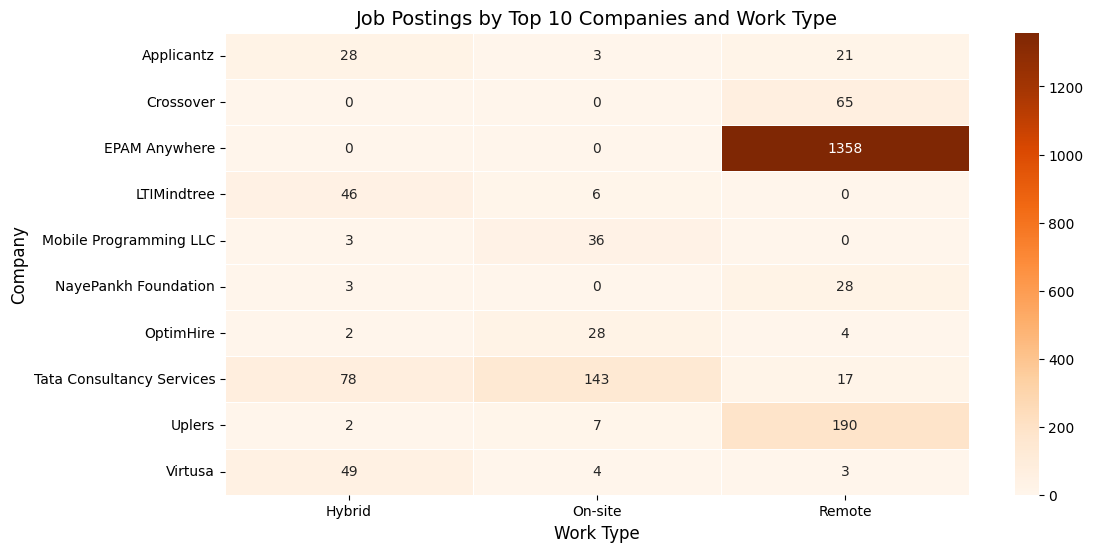

In [242]:
top_10_company_names = data["name"].value_counts().head(10).index

# Creating a pivot table for the heatmap (Companies vs. Work Type)
company_job_counts = data[data["name"].isin(top_10_company_names)].groupby(["name", "work_type"]).size().unstack().fillna(0)

# Creating the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(company_job_counts, annot=True, cmap="Oranges", fmt=".0f", linewidths=0.5)

# Customizing the plot
plt.title("Job Postings by Top 10 Companies and Work Type", fontsize=14)
plt.xlabel("Work Type", fontsize=12)
plt.ylabel("Company", fontsize=12)

# Show the plot
plt.show()


### Company Job Posting
1. EPAM Anywhere has the highest number of job postings, predominantly remote – This suggests the company strongly favors remote work.
2. TCS, Uplers, and Crossover also show a strong preference for remote jobs, making them attractive to job seekers looking for flexibility.
3. Companies like Virtusa and LTIMindtree have a more balanced mix of remote and on-site jobs, indicating flexibility in work arrangements.
4. Some companies, such as Mobile Programming LLC, favor on-site roles, suggesting a preference for traditional office settings.
5. Hybrid job postings are comparatively fewer across most companies, indicating that fully remote or fully on-site jobs are the dominant options.

## Conclusions & Recommendations:
### Job Seekers:

1. Those seeking tech roles (Data Analyst, Java Developer, Software Testing, Python Developer) should target cities like Bengaluru, Hyderabad, and Gurugram.
2. If remote work is a priority, Delhi, Kanpur, and Bengaluru have higher remote job postings.
3. For better hiring chances, applying to companies like EPAM Anywhere, TCS, and Uplers may be beneficial.

### Employers:

1. Companies hiring for tech positions should prioritize Bengaluru, Hyderabad, and Pune for finding talent.
2. To attract more applicants, small businesses should emphasize remote work or hybrid flexibility.
3. Industry-specific job posting improvements are needed, as many job postings lack an industry tag.

### Policy Makers & Educators:

1. Tech skills training should be emphasized in metro cities, as job demand is highest in IT-related roles.
2. Remote work enablement programs can be promoted in regions like Kanpur and Delhi, where remote jobs are in demand.
3. Encouraging investment in non-metro cities (e.g., Kanpur) may help balance job opportunities across regions.